# # Breast Cancer Detection on UCI ML Breast Cancer Wisconsin dataset

### Introduction


Breast cancer is the formation and reproduction of abnormal cells within breast tissue, causing the growth of tumors, benign or malignant, where the latter is where the abnormal cells start to infiltrate other parts of the body. As of today, it is the most common cancer in the world, with one in eight women in America having a history of breast cancer. In America alone, there are approximately 3.8 million women with a breast cancer diagnosis. Throughout the 20th and 21st century, the breast cancer death rate has decreased due to the myriad developments and improvements of modern medicine technology. Among these contributions, computer aided detection (CAD), which serves as a “second pair of eyes” for radiologists, have helped improve early detection of breast cancer, though there is only one federally approved CAD in the United States. A CAD utilizes machine learning algorithms to be able to spot patterns in breast tissue, a means to serve as a ‘double check’ for breast cancer detection.



 


The purpose of this project is to explore the applications of machine learning through breast cancer detection, using the “UCI ML Breast Cancer Wisconsin” dataset, in order to obtain a glimpse of how various machine learning techniques used in class can also combat real-world issues.


The “UCI ML Breast Cancer Wisconsin” dataset is a widely used and referenced dataset for machine learning applications.  Although the original dataset contains missing values and ten features, the built in version of the dataset in SKLearn has been refined so that there are no missing values as well as an expanded set of features. The data generally contains the computed scores for the main visual details of a fine needle aspirate of breast mass (perimeter, concavity, etc.). A fine needle aspirate is a biopsy method where a sample of cells is taken from an abnormal breast mass.


In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
%%capture
!pip install matplotlib --upgrade

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y= True) 
print(f'X shape {X.shape} y shape {y.shape}')

X shape (569, 30) y shape (569,)


In [ ]:
data = datasets.load_breast_cancer() 
X, y = data.data, data.target
df_X = pd.DataFrame(X, columns=data.feature_names) 
df_y = pd.DataFrame(y, columns = ['diagnosis'])

In [ ]:
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There are 569 samples, with 212 malignant classes and 357 benign classes, and 30 features in the SKLearn version of the dataset. The ten main visual characteristics of the images were expanded to 30 to contain the mean, std. error, and worst values for each of the 10 descriptors.

### Decision Trees

When looking at the dataset one of the first Machine Learning methods we thought to do was a decision tree.Since the data was made up of integers it would be easy for the tree to find a number to split on. We also wanted to do the decision tree because it would be the easiest for someone who is unaware of how Machine Learning algorithm works to understand the logic because it shows an easy to follow visual logic path to show how it got its classification.

Our initial decision tree we set to have a max depth of 10 because we wanted to make sure  all of the 10 features would get used when making the decision tree. When testing the accuracy of the tree it had an training accuracy of 100 percent accuracy and a test accuracy a little under 93 percent. We then wanted to see how the tree preformed when transforming the data with PCA, so once we transformed the data and ran the data it had a significant drop in test accuracy with 88 percent.


Noticing that the training accuracy was 100 percent, this shows that we overfit the data. So in order to reduce the overfitting we have to reduce the max depth. So after running some code we found the best depth for non-PCA was 2 and 6 with about 95% and for PCA was 5 with 90 percent. After we formed a tree using the depth of 2 and got this:



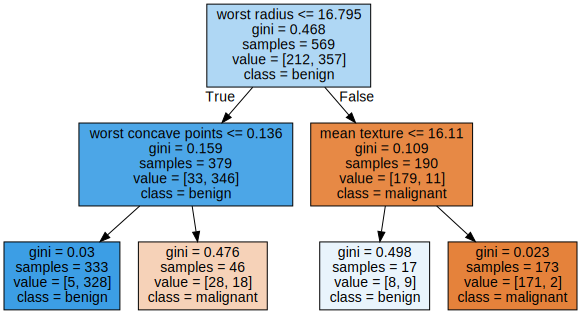

In [ ]:
#adjusting tree with best max_depth(2)
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth= 2,random_state=42)
clf = clf.fit(data.data, data.target)
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=data.feature_names,  
                                class_names=data.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

From this tree we notice that the three most important features are the worst radius, mean texture and worst concave points. We can see that most of the data falls into the outer two leaves. Both of these leaves have a low gini, which means most of the samples  that are in this leaf are correctly classified. While the two inner leaves have a high gini the sample size of both are small so it doesn't have as much weight as the other two leaves.


### Important Features and Breast Cancer Detection Practices

Computing a feature importance table can give us insight on what our machine learning algorithm is referencing the most in determining whether a sample is benign or malignant. Shown below, a feature importance barplot for a non-PCA Decision Tree algorithm with max depth 10:


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer() 
X, y = data.data, data.target
df_X = pd.DataFrame(X, columns=data.feature_names) 
df_y = pd.DataFrame(y, columns = ['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth= 10,random_state=42)
model.fit(X_train, y_train)
train_acc = model.score(X_train, y_train)
test_acc = accuracy_score(y_test, model.predict(X_test))
df_ = pd.DataFrame([[model.__class__.__name__, train_acc, test_acc]],columns= [ "model", "Training Accuracy", "Test Accuracy"])


featDict = {}
for col, val in sorted(zip(df_X.columns, model.feature_importances_),key=lambda x:x[1],reverse=True):
  featDict[col]=val
featDf = pd.DataFrame({'Feature':featDict.keys(),'Importance':featDict.values()})
featDf.head()

,Feature,Importance
0,worst concave points,0.728114
1,worst area,0.096315
2,area error,0.047493
3,worst concavity,0.026164
4,worst texture,0.019873


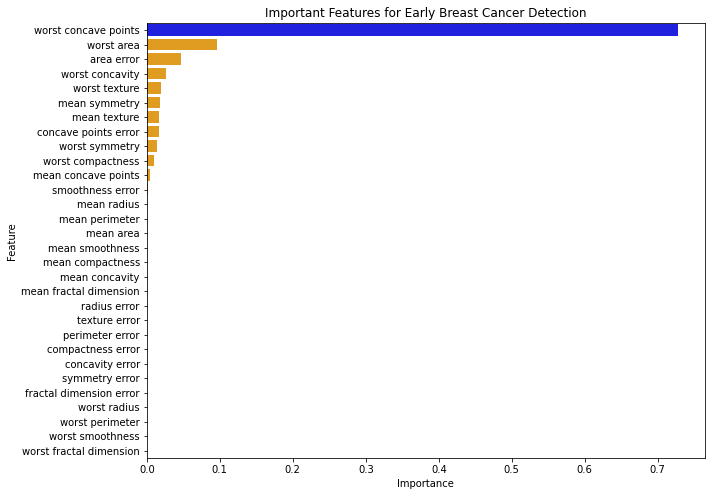

In [ ]:
import seaborn as sns
values = featDf.Importance    
idx = featDf.Feature
plt.figure(figsize=(10,8))
clrs = ['orange' if (x < max(values)) else 'blue' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important Features for Early Breast Cancer Detection')
plt.show()

From the plot. We can find that worst concave points, worst area, and area error are the three most important features for our Decision Tree algorithm, differing from the aforementioned most important features for the PCA Decision Tree. When considering what ‘important features’, or patterns of cancerous cells doctors and radiologists are looking for, they describe them as having an “abnormal” shape with varying sizes that differ from the size of a normal cell (American Cancer Society). This falls in line with the high importance score of worst concave points, as normal and benign cells would have a smaller value, or a less abnormal shape, than malignant cells. Because area error is measuring the difference in area from the mean, a higher error could be a big sign that the sample is malignant, since cancerous cells are “...either smaller or larger than normal cells”. From just a decision tree, we are able to find some insight into how Computer Aided Detection systems detect malignant patterns in cell samples, contributing as a “second pair of eyes” for doctors and radiologists.


Changing the max depth of the decision tree does not change the order of feature importance in the plot, but instead obscures the scores for all features besides the max-depth important ones. For example, if our max depth was 10, then only the top 10 features would be plotted, as there can only be a limited number of splits so that not all features are able to be used.


### Neural Network Architecture

The neural network takes in all the 30 features as an input to the first layer and outputs 20 which go through a ReLU activation function and batch normalization layer that rescales and centers the output to make it more stable. The first hidden layer takes the 20 features and outputs 15 followed by a ReLU and batch normalization layer again. We then used a dropout layer which randomly zeros out 10% of the neurons to prevent the model from overfitting. The last layer takes in 15 components and outputs a single feature which goes through a sigmoid activation function. 

We used Adam optimizer with learning rate of 0.001 and the default values for the other hyperparameters, and BCE loss function with the equation below.  

   BCE Loss = -${\dfrac{1}{N}\cdot\sum_{i=1}^{N}(y_i\log(\hat{y_i})) + (1 - y_i)\log(1 - \hat{y_i}))}$

#### Adam optimizer
Adam update keeps exponentially decaying average of past squared gradients, $v_t$ , and past gradients $m_t$. At every epoch $t$ we compute $m_t$ & $v_t$ as follows,

$m_t = \beta_1 m_{t-1} + (1 \ - \ \beta_1) g_t $

$v_t = \beta_2 v_{t-1} + (1 \ - \ \beta_2) g_t^2 $

Where $m_t$ & $v_t$ are the average first and second moments and $\beta_1$ & $\beta_2$ are hyperparameters usually set to 0.9 and 0.999, and $ g_t $ is the current gradient.
We than bias correct the first and second moments by the equations,

$\hat{m}_t = \dfrac{m_t}{\ 1 - \ \beta^t_1}$

$\hat{v}_t = \dfrac{v_t}{\ 1 - \ \beta^t_2}$  and use these to update our parameters, weights and biases, in the current epoch $\theta_{t+1}$, as follows

$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$,  where $\eta$ is the learning rate and $\theta_{t}$ is the parameter from the previous epoch.



#### Batch normalization

[Batch normalization](http://arxiv.org/abs/1502.03167) helps reduce sensitivity to bad initialization of weights by explicitly forcing activations throughout the network to take on a unit gaussian distribution at the start of the training. It is used right after the layer output and before applying the activation function which helps with the "Dying ReLU" problem, always outputting a 0. Batch normalization can also be interpreted as preprocessing the data at every layer.    

$\mu = \frac{1}{m} \sum_{i=1}^{m} \textbf{x}^{(i)}$

$ \sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (\textbf{x}^{(i)} – \mu)^2$

$ \textbf{x}^{(i)}_{new} = \frac{\textbf{x}^{(i)} – \mu}{\sqrt{\sigma^2 + \epsilon}}$

$ \textbf{z}^{(i)} = \gamma \textbf{x}^{(i)}_{new} + \beta$

$\mu$ is the mean over the mini-batch that has m training instances 
 
$\textbf{x}$. $\sigma$ is the standard deviation, 

$\textbf{x}^{(i)}_{new}$ is the zero-centered and normalized input $ \textbf{x}^{(i)}$. 

$ \epsilon$ is to avoid division by zero. It is typically set up as $10^{-5}$. 

$\gamma$ and $\beta$ are the scaling and shifting parameters to train.

#### Dropout layer

[Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) works by keeping only a percentage of the "neurons" and setting the rest to zero with some probability, 10% in our case. It can be interpreted as sampling the full neural network and updating only the sampled network which approximates training neural networks with different architectures in parallel. 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)
n_components = 10
pca = PCA(n_components)
pca.fit(X_norm)

X_transformed = pca.transform(X_norm)
df_x_norm =  pd.DataFrame(X_transformed)

e_var = pca.explained_variance_ratio_.sum() * 100
print(f'Percentage of variance explained by {n_components} components  = {e_var:.2f} %')

Percentage of variance explained by 10 components  = 95.16 %


In [ ]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=69)

In [ ]:
## Data loader
class Data(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
      
train_data = Data(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_data = Data(torch.FloatTensor(X_test),torch.FloatTensor(y_test))

In [ ]:
# load training and testing data  
batch_size = 64
train_loader = DataLoader(dataset=train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.layer_1 = nn.Linear(30, 20) 
        self.layer_2 = nn.Linear(20, 15)
        self.layer_out = nn.Linear(15, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm = nn.BatchNorm1d(20)
        self.batchnorm2 = nn.BatchNorm1d(15)
    # forward pass    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [ ]:
# accuracy function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [ ]:
# set up loss function and optimizer
model = NN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

NN(
  (layer_1): Linear(in_features=30, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=15, bias=True)
  (layer_out): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
# train for 100 epochs
epoch = 100
pl = {"loss":[],"acc":[],"epoch":[]} 
model.train()
for e in range(1, epoch + 1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        # model pridiction
        y_pred = model(X_batch)
        # compute loss and accuracy
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        # append loss and accuracy for plotting
        pl["loss"].append(loss.item())
        pl["acc"].append(acc.item()/100)
        pl["epoch"].append(e + 1)
        # do backprop and step the optimizer
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    if e % 10 == 0:
        print(f'Epoch {e}: | Loss: {epoch_loss/len(train_loader):.4f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 10: | Loss: 0.3230 | Acc: 94.500
Epoch 20: | Loss: 0.1780 | Acc: 97.500
Epoch 30: | Loss: 0.1135 | Acc: 97.833
Epoch 40: | Loss: 0.0727 | Acc: 98.833
Epoch 50: | Loss: 0.0511 | Acc: 99.000
Epoch 60: | Loss: 0.0390 | Acc: 99.167
Epoch 70: | Loss: 0.0384 | Acc: 99.167
Epoch 80: | Loss: 0.0340 | Acc: 99.333
Epoch 90: | Loss: 0.0255 | Acc: 99.500
Epoch 100: | Loss: 0.0248 | Acc: 99.000


In [ ]:
# test the model
y_pred = []
model.eval()
with torch.no_grad():
    for X_batch,_ in test_loader:
        X_batch = X_batch.to(device)
        y_pred.append(torch.round(torch.sigmoid(model(X_batch))).cpu().numpy())

y_pred = [a.squeeze().tolist() for a in y_pred]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.96      1.00      0.98       104

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



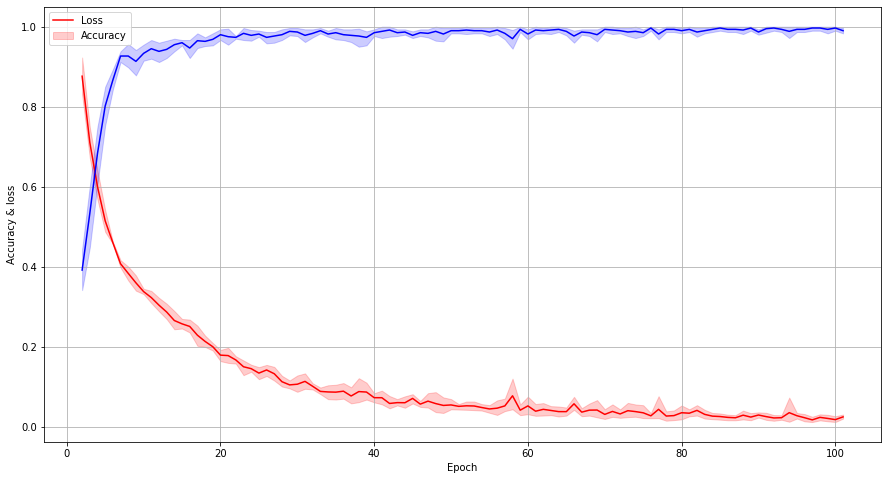

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(data = pl ,x = "epoch", y = "loss",color = 'r')
sns.lineplot(data = pl ,x = "epoch", y = "acc",color = 'b')

ax.legend( ('Loss', 'Accuracy') )
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy & loss')
ax.grid()
fig.set_figwidth(15)
fig.set_figheight(8)

## Receiver Operating Characteristic (ROC)

Using a binary classifier in practice for something as important as detecting breast cancer, avoiding false negatives in our classification is imperative. When applying this classifier, the worst possible scenario would be classifying a real breast cancer patient's malignant tumor as benign.

Given that false negatives are the worst case scenario, it makes sense to maximize the number of false positives, within reason. The accuracy of the classifier is not equally important in both directions due to the extreme consequences of a misclassification towards false negative.

For classifiers that output probability values between 0 and 1, one of the hyperparameters we can adjust is the threshold for positive and negative classifications. As an example, one could choose a threshold of 0.5 for positive and negative classifications. If a classifier outputs a probability of 0.49 for a patient's tumor being malignant, there is likely still cause for concern. Thus, even if our classifier has an optimal threshold of 0.5 for maximizing overall accuracy, it makes sense to adjust the threshold such that false negatives are avoided more often, even at the cost of overall accuracy.

Below is an example of creating an ROC plot for a trained neural network using SKLearn.



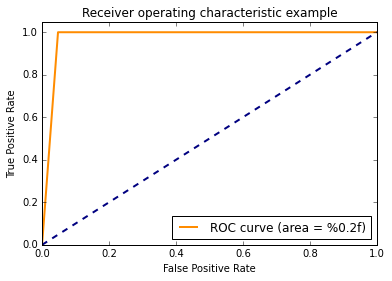

array([2., 1., 0.])

In [ ]:
#y_score = clf.predict_proba(X_test)
#y_score = y_score[:,1]

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.style.use('classic')
%matplotlib inline

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)",
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

display(thresholds)

The ROC plot above can be interpreted as follows:

The axes of the plot are the true positive rate (TPR) and the false positive rate (FPR). For maximal classification accuracy, the optimal value of TPR is 1.0, as in all positives are labelled as such, and the optimal value of FPR is 0, meaning we did not misclassify any negative labels.

The dotted blue line represents the expected performance of a random classifier. The TPR and FPR would normally be equal in this case, hence the line being straight. The orange line represents the curve generated by various thresholds and their respective TPR and FPR values. Optimal thresholds for the classifier exist at the top right of the graph, since points towards the left reduce false positives, and towards the top increase true positives.

For our needs, moving the threshold value towards the right of the curve (increasing false positives, and as a result, decreasing false negatives). The ```roc_curve``` output from SKL provides a list of thresholds to try that correspond to the TPR/FPR points in the graph.

## Overall Findings

Altogether, we used 6 different supervised learning algorithms. The first 5 of these classifiers (Logistic Regression, SVC, KNN, Decision Tree, Gaussian, and Random Forest) gave great results that exceeded our expectations, even with minimal training. All of them had training and test accuracy of above 90% without doing PCA. Logistic regression and the Random Forest classifiers stood out as the only ones that reached 95% test accuracy. Performing the PCA analysis allowed us to increase the accuracy for most of the algorithms, as two features, concavity and symmetry, accounted for 70% of the variation in the dataset. The test accuracy of logistic regression, SVC, and KNN classifiers was above 95% when using the dataset post PCA analysis. The accuracy of the Random Forest classifier’s accuracy dropped significantly, however, to just barely above 90%. The results for all the aforementioned classifiers is demonstrated below.


####Train different models with the original and PCA transformed data

#### Results Without PCA:

In [ ]:
# training function for different models
def train_eval(models, X_train, X_test, y_train, y_test,):
    df_res = pd.DataFrame()
    for model in models:
        model.fit(X_train, y_train)
        # compute training and testing accuracy
        train_acc = model.score(X_train, y_train)
        test_acc = accuracy_score(y_test, model.predict(X_test))
        df_ = pd.DataFrame([[model.__class__.__name__, train_acc, test_acc]],columns= [ "model", "Training Accuracy", "Test Accuracy"])
        df_res = df_res.append(df_)
    return df_res

In [ ]:
# set up models with random states for  reproducibility
models = [LogisticRegression(max_iter=2500,random_state=42),SVC(random_state=42),  # logistic reg max_iter=2500 to avoid convergence warning
         KNeighborsClassifier(),DecisionTreeClassifier(max_depth= 10,random_state=42),
         GaussianNB(), RandomForestClassifier(random_state=42)] 


In [ ]:
# results without pca
res = train_eval(models,X_train,X_test, y_train , y_test).reset_index(drop=True)
res

,model,Training Accuracy,Test Accuracy
0,LogisticRegression,0.989501,0.962766
1,SVC,0.989501,0.973404
2,KNeighborsClassifier,0.973753,0.952128
3,DecisionTreeClassifier,1.000000,0.936170
4,GaussianNB,0.934383,0.909574
5,RandomForestClassifier,1.000000,0.962766


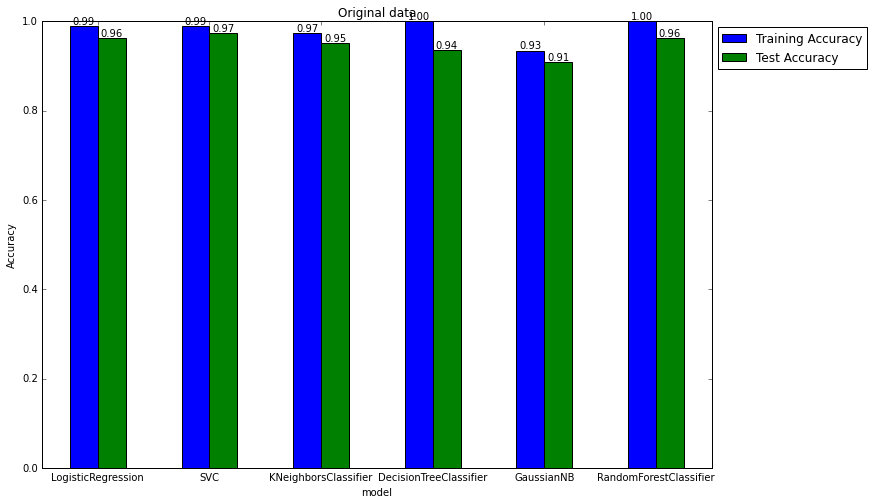

In [ ]:
ax = res.plot(x='model',kind='bar',stacked=False,title='Original data',figsize = (12,8))
plt.xticks(rotation = 0, horizontalalignment="center")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.ylabel('Accuracy')
for container in ax.containers:
    ax.bar_label(container, fmt= '%.2f')
plt.show()


#### PCA Transformed Results

In [ ]:
# split the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# split the transformed data
X_train_t, X_test_t, y_train, y_test  = train_test_split(X_transformed, y, test_size = 0.3, random_state = 0)

In [ ]:
# pca transformed
res_ = train_eval(models,X_train_t,X_test_t, y_train , y_test).reset_index(drop=True)
res_

,model,Training Accuracy,Test Accuracy
0,LogisticRegression,0.984925,0.959064
1,SVC,0.984925,0.970760
2,KNeighborsClassifier,0.969849,0.964912
3,DecisionTreeClassifier,1.000000,0.888889
4,GaussianNB,0.927136,0.912281
5,RandomForestClassifier,1.000000,0.906433


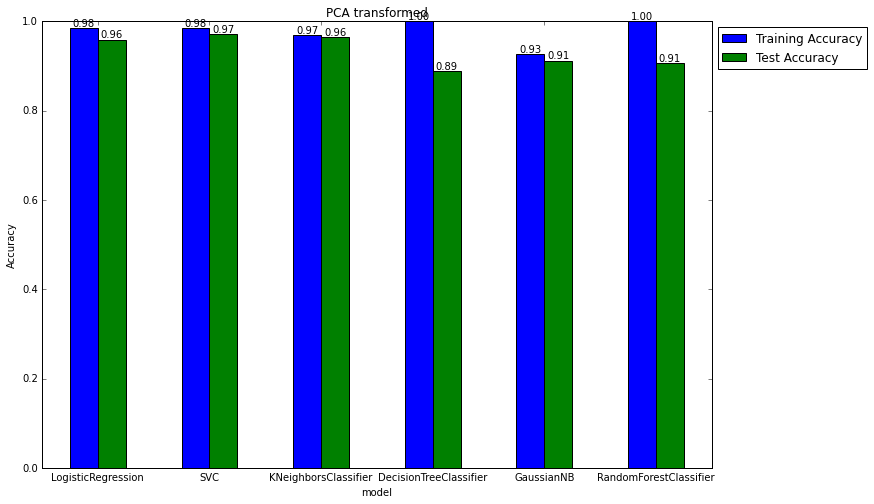

In [ ]:
ax = res_.plot(x='model',kind='bar',stacked=False,title='PCA transformed',figsize = (12,8))
plt.xticks(rotation = 0, horizontalalignment="center")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.ylabel('Accuracy')
for container in ax.containers:
    ax.bar_label(container, fmt= '%.2f')
plt.show()

The base accuracy of our 6th algorithm, a neural network implemented with sklearn, was higher than any of the other 5 algorithms used at 97% test accuracy. Only the SVC algorithm matched this accuracy with the PCA analysis, however, PCA by nature has some information loss which could cause unexpected results for some cases. Thus, so it would be better to avoid PCA for medical cases where accuracy and a complete picture of the data, in all cases, is paramount. This made neural networks the only natural choice for detecting breast cancer from a fine needle aspirate. 


#Code Used in Analysis and Further Reading

####Setting up PCA:

In [ ]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)
n_components = 10
pca = PCA(n_components)
pca.fit(X_norm)

X_transformed = pca.transform(X_norm)
df_x_norm =  pd.DataFrame(X_transformed)

e_var = pca.explained_variance_ratio_.sum() * 100
print(f'Percentage of variance explained by {n_components} components  = {e_var:.2f} %')

Percentage of variance explained by 10 components  = 95.16 %


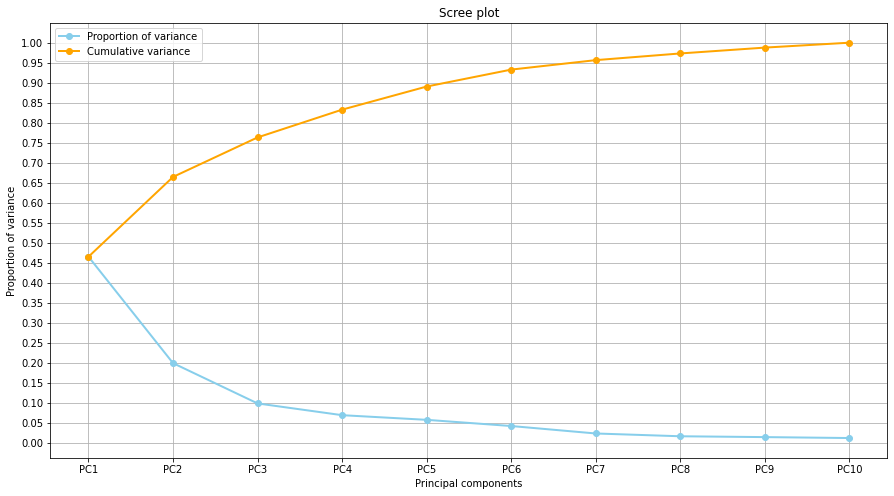

In [ ]:
eigenvalues, eigenvectors = pca.explained_variance_, pca.components_
# proportion of variance explained by each feature
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

# cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]
fig, ax = plt.subplots()

ax.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
ax.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
ax.legend()
ax.set_xlabel('Principal components')
ax.set_ylabel('Proportion of variance')
ax.set_title('Scree plot')
ax.set_yticks(np.arange(0,1.05,0.05))
ax.grid()
fig.set_figwidth(15)
fig.set_figheight(8)

###Decision Tree


In [ ]:
# non-PCA tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
df_res = pd.DataFrame()
for x in range(1, 11, 1):
  model = DecisionTreeClassifier(max_depth= x,random_state=42)
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = accuracy_score(y_test, model.predict(X_test))
  df_ = pd.DataFrame([[x, train_acc, test_acc]],columns= [ "depth", "Training Accuracy", "Test Accuracy"])
  df_res = df_res.append(df_)

In [ ]:
df_res

,depth,Training Accuracy,Test Accuracy
0,1,0.929648,0.894737
0,2,0.959799,0.947368
0,3,0.967337,0.941520
0,4,0.977387,0.935673
0,5,0.987437,0.941520
0,6,0.997487,0.947368
0,7,1.000000,0.929825
0,8,1.000000,0.929825
0,9,1.000000,0.929825
0,10,1.000000,0.929825


In [ ]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)
n_components = 10
pca = PCA(n_components)
pca.fit(X_norm)

X_transformed = pca.transform(X_norm)
df_x_norm =  pd.DataFrame(X_transformed)

e_var = pca.explained_variance_ratio_.sum() * 100

In [ ]:
#best depth for PCA transformed data
X_train_t, X_test_t, y_train, y_test  = train_test_split(X_transformed, y, test_size = 0.3, random_state = 0)
df_res2 = pd.DataFrame()
for x in range(1, 11, 1):
  model = DecisionTreeClassifier(max_depth= x,random_state=42)
  model.fit(X_train_t, y_train)
  train_acc = model.score(X_train_t, y_train)
  test_acc = accuracy_score(y_test, model.predict(X_test_t))
  df_2 = pd.DataFrame([[x, train_acc, test_acc]],columns= [ "depth", "Training Accuracy", "Test Accuracy"])
  df_res2 = df_res2.append(df_2)

In [ ]:
df_res2

,depth,Training Accuracy,Test Accuracy
0,1,0.934673,0.871345
0,2,0.942211,0.871345
0,3,0.962312,0.865497
0,4,0.974874,0.865497
0,5,0.984925,0.900585
0,6,0.994975,0.877193
0,7,0.997487,0.877193
0,8,0.997487,0.871345
0,9,1.000000,0.888889
0,10,1.000000,0.888889


References/Further Reading

Breast cancer facts &amp; statistics 2022. breastcancer dot org. (n.d.). Retrieved December 5, 2022, from 
https://www.breastcancer.org/facts-statistics

Street, W. N., Wolberg, W. H., &amp; Mangasarian, O. L. (1993). . SPIE Proceedings. 
https://doi.org/10.1117/12.148698

Fine needle aspiration (FNA) biopsy information. myVMC. (2017, August 16). Retrieved December 6, 2022, from
https://www.myvmc.com/investigations/fine-needle-aspiration-biopsy-fna/

Kane G, Fleming C, Heneghan H, McCartan D, James P, Trueick R, Harrington L, Nally F, Quinn C, O'Doherty A, McNally S, Rothwell J, Evoy D, Geraghty J, McDermott E, Prichard R. False-negative rate of ultrasound-guided fine-needle aspiration cytology for identifying axillary lymph node metastasis in breast cancer patients. Breast J. 2019 Sep;25(5):848-852. doi: 10.1111/tbj.13402. Epub 2019 Jun 13. PMID: 31197915.

Kim Y, Rim J, Kim SM, Yun B, Park SY, Ahn HS, Kim B, Jang M. False-negative results on computer-aided detection software in preoperative automated breast ultrasonography of breast cancer patients. Ultrasonography. 2021 Jan;40(1):83-92. doi: 10.14366/usg.19076. Epub 2020 Mar 24. PMID: 32422696; PMCID: PMC7758101.

Bahl, M. (2019). Detecting Breast Cancers with Mammography: Will AI Succeed Where Traditional CAD Failed? In Radiology (Vol. 290, Issue 2, pp. 315–316). Radiological Society of North America (RSNA). https://doi.org/10.1148/radiol.2018182404

